# Global Population Statistics

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Get the data

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [4]:
df = pd.read_excel('files/Antonio_Project_Dataset.xlsx')
df.head()

,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
0,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,NaN,99.103333,32.7920,NaN,NaN,26.230847,...,NaN,NaN,NaN,95.133034,NaN,NaN,99.058319,NaN,141.187288,0.89
1,AFG,Afghanistan,Middle East & Russia,Mirage,NaN,NaN,111.1414,NaN,24.0,0.154101,...,36.0,NaN,24.6,NaN,27.7,81574.0,NaN,72.320000,73.065520,40.00
2,AGO,Angola,Sub-Saharan Africa,Sideswipe,9200.0,74.893661,178.1842,6.0,NaN,1.181527,...,NaN,1.6,23.7,39.270191,37.3,1377992.0,74.893661,71.968002,127.544974,69.00
3,ALB,Albania,Eastern Europe,Skids & Mudflap,100.0,87.151161,18.9116,14.0,NaN,1.484311,...,NaN,0.1,9.7,92.830223,7.1,NaN,87.151161,59.299999,77.451711,0.70
4,AND,Andorra,Eastern Europe,Skids & Mudflap,NaN,NaN,NaN,NaN,NaN,6.427887,...,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN


## Explore the DataFrame

Get all the column names and number of entries:
1. 45 columns with the country's statistics population, development, and illness statistics. 
2. 217 countries

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 45 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Country Code Total                                                         217 non-null    object 
 1   Country Name                                                               217 non-null    object 
 2   Hult Region                                                                217 non-null    object 
 3   Cool Name                                                                  217 non-null    object 
 4   AIDS estimated deaths (UNAIDS estimates)                                   132 non-null    float64
 5   Adjusted net enrollment rate, primary (% of primary school age children)   131 non-null    float64
 6   Adolescent fertility rate (births per 1,000 women ages 15-

Visualize the basic statistics:
1. Some missing data in each column `(count < 217)`
2. Some outliers `(Primary completion rate > 100%)`
3. Features have very different scales `6 orders of magnitude between some columns`

In [6]:
df.describe()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
count,1.320000e+02,131.000000,194.000000,136.000000,102.000000,204.000000,187.000000,187.000000,187.000000,187.000000,...,47.000000,137.000000,172.000000,131.000000,180.000000,9.300000e+01,131.000000,187.000000,190.000000,197.000000
mean,2.490250e+04,90.331791,54.787428,22.272059,91.355588,5.050002,15.473526,7.354737,10.456879,47.011898,...,91.456383,2.065693,12.355233,86.759085,17.532916,1.522238e+05,88.834660,42.176336,100.639379,16.504975
std,1.509742e+05,12.462853,44.834884,18.619172,17.011526,6.579363,18.575996,9.249641,12.468590,15.999568,...,13.375410,4.456628,11.405709,18.933534,10.225183,3.340710e+05,12.157151,26.230668,77.980887,22.840072
min,1.000000e+02,42.735741,0.574400,1.000000,24.000000,0.023219,0.008000,0.010000,0.013000,7.088000,...,36.000000,0.100000,2.500000,35.053108,0.300000,2.000000e+00,42.735741,0.460000,0.183104,0.110000
25%,2.000000e+02,88.301540,18.035950,8.000000,95.050000,0.632640,1.230000,0.621000,0.901000,39.137499,...,90.550000,0.100000,2.600000,78.460087,9.950000,7.620000e+02,87.409653,17.928000,63.250463,1.200000
50%,9.050000e+02,95.668457,44.123700,17.500000,99.050000,2.647011,7.234000,3.720000,5.208000,47.197969,...,97.000000,0.400000,7.850000,94.013634,15.400000,1.181500e+04,93.359009,38.243000,87.044404,5.200000
75%,6.000000e+03,97.998436,81.483700,30.250000,99.800000,7.029875,24.707500,10.490500,14.077500,58.135000,...,99.800000,1.600000,17.375000,98.596214,23.425000,8.445200e+04,96.728035,63.496000,115.466018,23.000000
max,1.700000e+06,99.856499,208.116200,87.000000,100.000000,46.672138,66.024002,45.877998,51.342999,83.293999,...,100.000000,26.300000,53.000000,119.184921,56.300000,1.618218e+06,99.778450,93.317001,860.800000,101.000000


## Part 1 - Exploratory Data Analysis

In [7]:
#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###  Get a general overview of the relationship between columns 

Observations:
1. Several columns are very highly correlated. 
2. Many of these same columns have the same correlation patterns with other columns as the others. 
2. We can cluster these columns together and create features. 

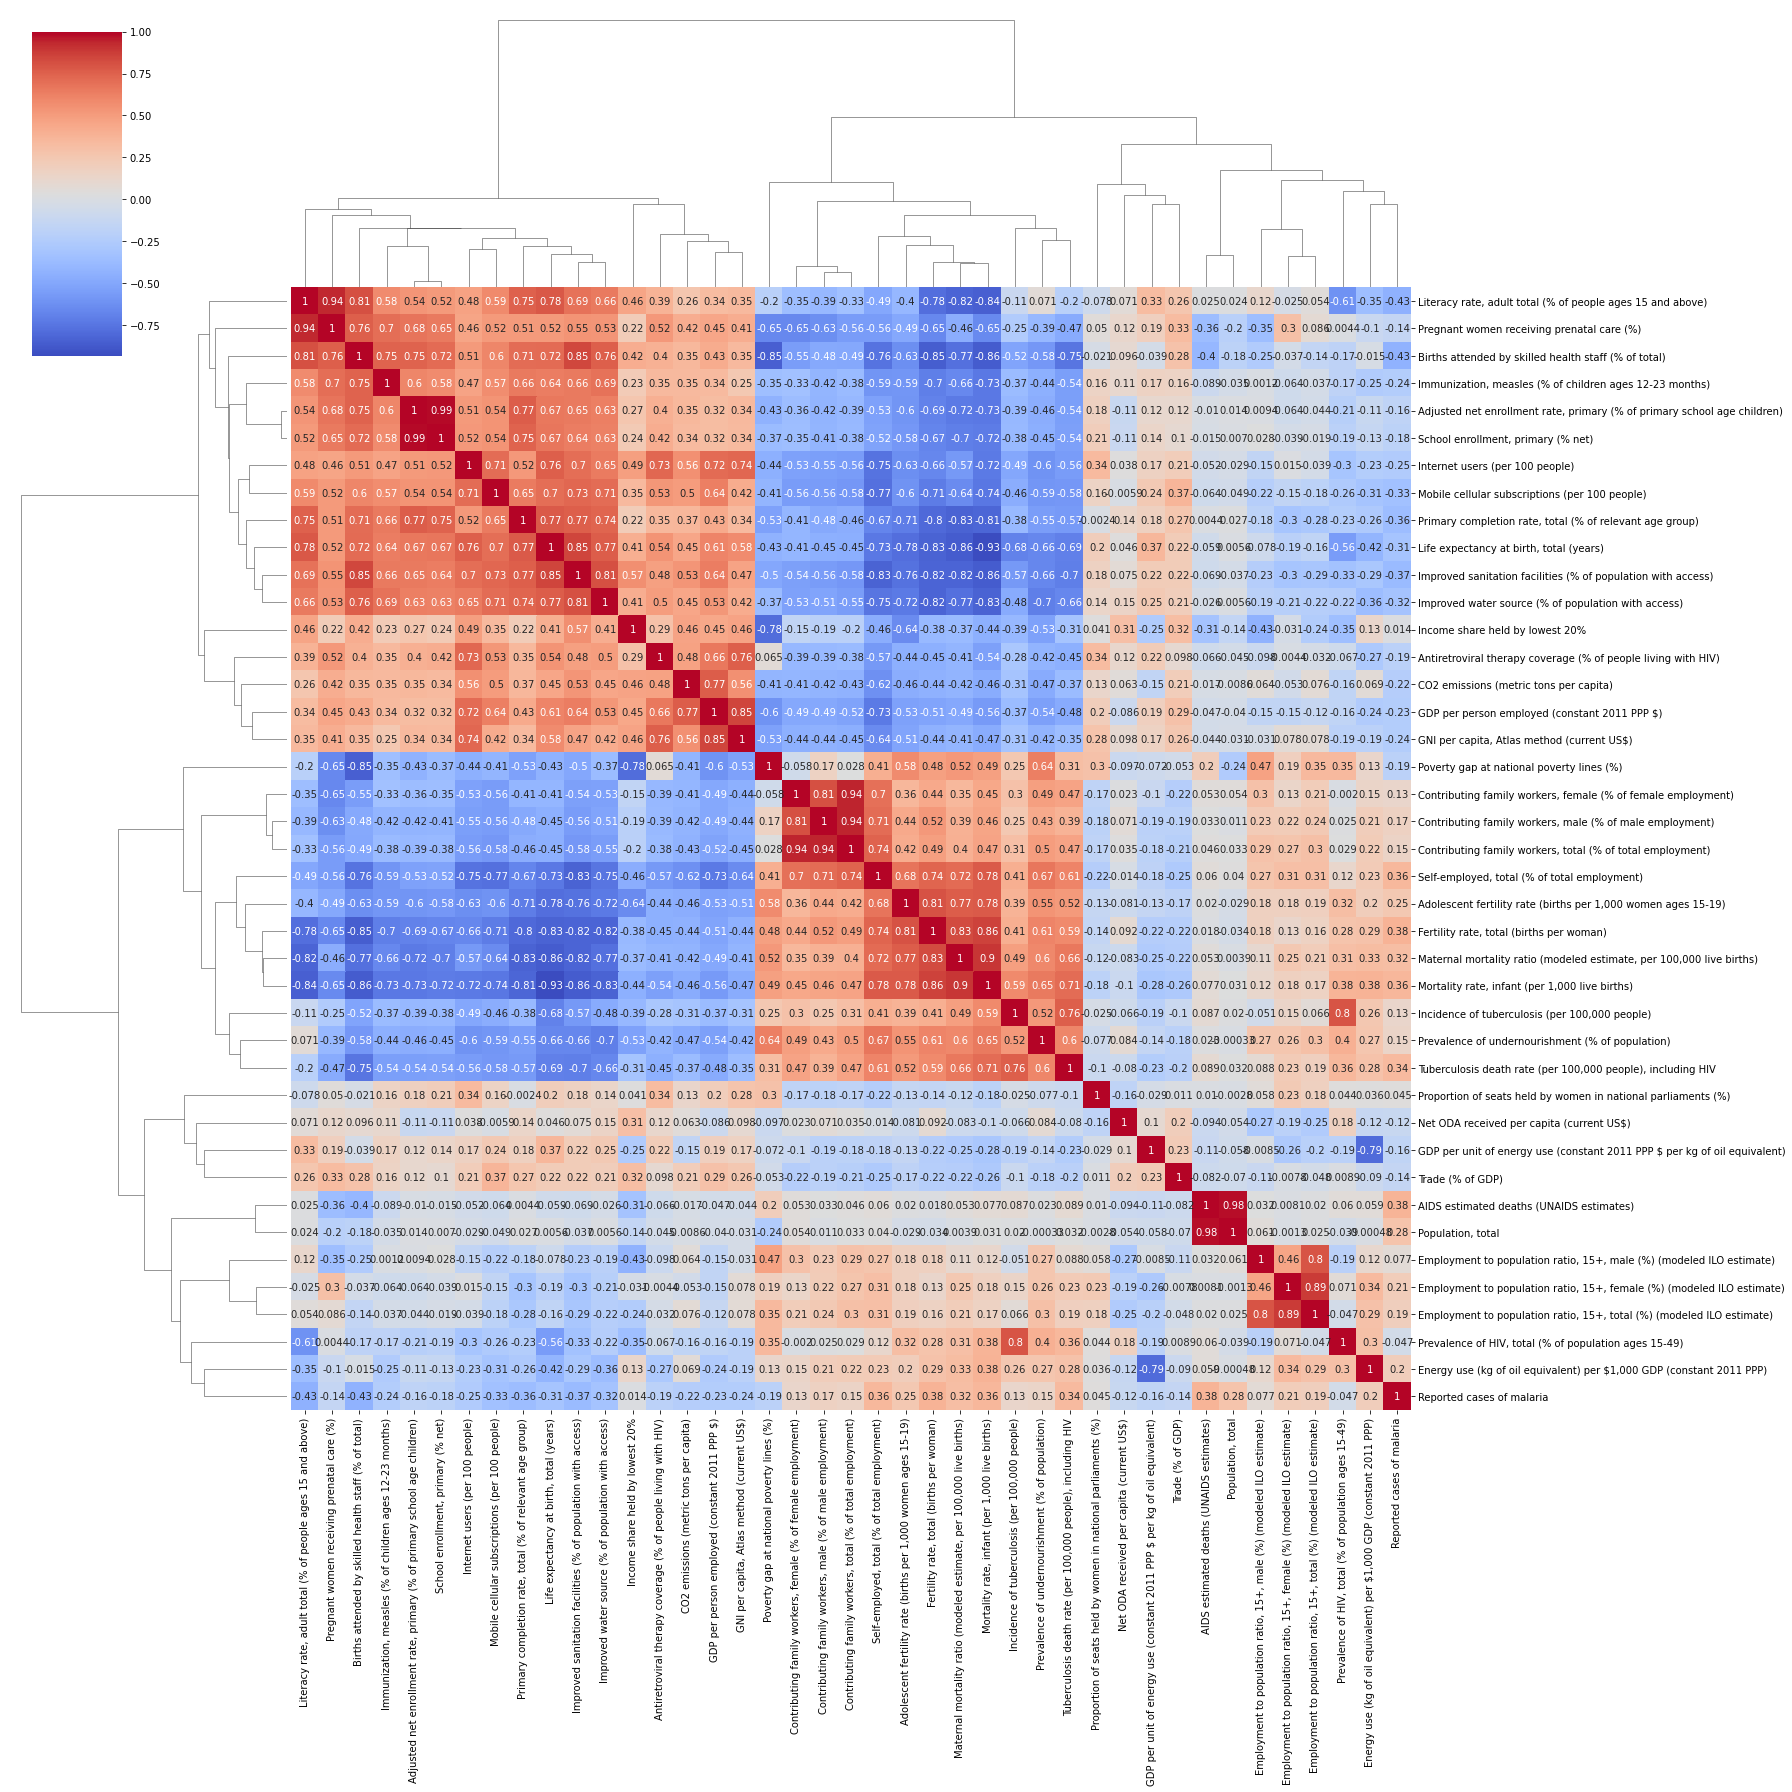

In [8]:
sns.clustermap(df.corr(),annot=True,cmap='coolwarm',figsize=(25,25))

#### Miscellaneous notes to self 
1. Higher literacy rate -corr with higher %pregnant women receiving care, lower infant mortality, maternal mortality, fertility rate
2. Higher births attended by prenatal staff -corr with lower infant mortality, maternal mortality, fertility rate
2. Incidence of tuberculosis -corr with prevalence of HIV
3. Percent self-employed -correlated with undernourishment, less GDP per person employed
5. Mortality rates -correlation with life expectancy at birth 
6. Immunization -corr with mortality rates

## Feature Engineering - Group Columns Into Development Indicators

1. Country economic development
3. Proper Infrastructure
2. Population Demographics
4. Mortality/illness rates

### Step 1: Normalize Features 

In [14]:
# Drop non-numerical columns 
numerical = df.drop(['Country Code Total', 'Country Name', 'Hult Region', 'Cool Name'], axis=1)
numerical.columns

Index(['AIDS estimated deaths (UNAIDS estimates)',
       'Adjusted net enrollment rate, primary (% of primary school age children)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Antiretroviral therapy coverage (% of people living with HIV)',
       'Births attended by skilled health staff (% of total)',
       'CO2 emissions (metric tons per capita)',
       'Contributing family workers, female (% of female employment)',
       'Contributing family workers, male (% of male employment)',
       'Contributing family workers, total (% of total employment)',
       'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
       'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)',
       'Fertility rate, total (births per woman)',
       'GDP per person employed (

In [15]:
# Normalize column values
from sklearn import preprocessing

x = numerical.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
numerical = pd.DataFrame(x_scaled,df['Country Code Total'],df.columns.drop(['Country Code Total', 'Country Name', 'Hult Region', 'Cool Name']))
numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,0.986814,0.155234,NaN,NaN,0.561806,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.714117,NaN,NaN,0.987376,NaN,0.163841,0.007731
AFG,NaN,NaN,0.532746,NaN,0.0,0.002806,0.973022,0.511882,0.562011,0.076556,...,0.0,NaN,0.437624,NaN,0.489286,0.050409,NaN,0.773878,0.084686,0.395381
AGO,0.005353,0.562981,0.855778,0.058140,NaN,0.024830,0.228869,0.258830,0.262322,0.740165,...,NaN,0.057252,0.419802,0.050125,0.660714,0.851549,0.563752,0.770087,0.147989,0.682823
ALB,0.000000,0.777571,0.088354,0.151163,NaN,0.031321,0.735928,0.307273,0.560530,0.436803,...,NaN,0.000000,0.142574,0.686745,0.121429,NaN,0.778634,0.633662,0.089783,0.005848
AND,NaN,NaN,NaN,NaN,NaN,0.137295,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.441071,NaN,NaN,NaN,NaN,NaN


### Step 2: Fill missing values

In [16]:
# Fill missing values in every column with the column mean
for column in numerical.columns:
    numerical[column] = numerical[column].fillna(numerical[column].mean())
    
numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.014591,0.986814,0.155234,0.247350,0.886258,0.561806,0.234269,0.160128,0.203465,0.523894,...,0.866506,0.075026,0.195153,0.714117,0.307731,0.094068,0.987376,0.449254,0.163841,0.007731
AFG,0.014591,0.833253,0.532746,0.247350,0.000000,0.002806,0.973022,0.511882,0.562011,0.076556,...,0.000000,0.075026,0.437624,0.614583,0.489286,0.050409,0.808147,0.773878,0.084686,0.395381
AGO,0.005353,0.562981,0.855778,0.058140,0.886258,0.024830,0.228869,0.258830,0.262322,0.740165,...,0.866506,0.057252,0.419802,0.050125,0.660714,0.851549,0.563752,0.770087,0.147989,0.682823
ALB,0.000000,0.777571,0.088354,0.151163,0.886258,0.031321,0.735928,0.307273,0.560530,0.436803,...,0.866506,0.000000,0.142574,0.686745,0.121429,0.094068,0.778634,0.633662,0.089783,0.005848
AND,0.014591,0.833253,0.261215,0.247350,0.886258,0.137295,0.234269,0.160128,0.203465,0.523894,...,0.866506,0.075026,0.195153,0.614583,0.441071,0.094068,0.808147,0.449254,0.116726,0.162503


### Step 3: Create Features

In [25]:
# Economic development indicator
numerical['Economic Development'] = (numerical['CO2 emissions (metric tons per capita)'] + numerical['GDP per person employed (constant 2011 PPP $)'] + numerical['Trade (% of GDP)'] + numerical['Mobile cellular subscriptions (per 100 people)'] + numerical['GNI per capita, Atlas method (current US$)'] \
    + numerical['Internet users (per 100 people)'] + numerical['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)'] + numerical['GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)'] \
    + numerical['Net ODA received per capita (current US$)']) / 9

numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",economicDevelopment,Proper Infrastructure,Demographic Poverty,illnessDeathRates,Illness/Death Rates,Economic Development
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.014591,0.986814,0.155234,0.247350,0.886258,0.561806,0.234269,0.160128,0.203465,0.523894,...,0.987376,0.449254,0.163841,0.007731,0.307317,0.835479,0.190009,0.080134,0.080134,0.307317
AFG,0.014591,0.833253,0.532746,0.247350,0.000000,0.002806,0.973022,0.511882,0.562011,0.076556,...,0.808147,0.773878,0.084686,0.395381,0.096144,0.391299,0.574950,0.266750,0.266750,0.096144
AGO,0.005353,0.562981,0.855778,0.058140,0.886258,0.024830,0.228869,0.258830,0.262322,0.740165,...,0.563752,0.770087,0.147989,0.682823,0.112061,0.439077,0.451419,0.489235,0.489235,0.112061
ALB,0.000000,0.777571,0.088354,0.151163,0.886258,0.031321,0.735928,0.307273,0.560530,0.436803,...,0.778634,0.633662,0.089783,0.005848,0.162700,0.769310,0.321749,0.035958,0.035958,0.162700
AND,0.014591,0.833253,0.261215,0.247350,0.886258,0.137295,0.234269,0.160128,0.203465,0.523894,...,0.808147,0.449254,0.116726,0.162503,0.251481,0.820195,0.193499,0.067901,0.067901,0.251481


In [18]:
# Health and education infrastructure indicator
numerical['Proper Infrastructure'] = (numerical['Immunization, measles (% of children ages 12-23 months)'] \
    + numerical['Improved sanitation facilities (% of population with access)'] \
    + numerical['Improved water source (% of population with access)'] \
    + numerical['Adjusted net enrollment rate, primary (% of primary school age children)'] \
    + numerical['School enrollment, primary (% net)'] \
    + numerical['Antiretroviral therapy coverage (% of people living with HIV)'] \
    + numerical['Pregnant women receiving prenatal care (%)']) / 7

numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",economicDevelopment,Proper Infrastructure
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.014591,0.986814,0.155234,0.247350,0.886258,0.561806,0.234269,0.160128,0.203465,0.523894,...,0.195153,0.714117,0.307731,0.094068,0.987376,0.449254,0.163841,0.007731,0.307317,0.835479
AFG,0.014591,0.833253,0.532746,0.247350,0.000000,0.002806,0.973022,0.511882,0.562011,0.076556,...,0.437624,0.614583,0.489286,0.050409,0.808147,0.773878,0.084686,0.395381,0.096144,0.391299
AGO,0.005353,0.562981,0.855778,0.058140,0.886258,0.024830,0.228869,0.258830,0.262322,0.740165,...,0.419802,0.050125,0.660714,0.851549,0.563752,0.770087,0.147989,0.682823,0.112061,0.439077
ALB,0.000000,0.777571,0.088354,0.151163,0.886258,0.031321,0.735928,0.307273,0.560530,0.436803,...,0.142574,0.686745,0.121429,0.094068,0.778634,0.633662,0.089783,0.005848,0.162700,0.769310
AND,0.014591,0.833253,0.261215,0.247350,0.886258,0.137295,0.234269,0.160128,0.203465,0.523894,...,0.195153,0.614583,0.441071,0.094068,0.808147,0.449254,0.116726,0.162503,0.251481,0.820195


In [19]:
# Population poverty indicator 
numerical['Demographic Poverty'] = (numerical['Population, total'] \
    + numerical['Prevalence of undernourishment (% of population)']   \
    + numerical['Contributing family workers, female (% of female employment)'] \
    + numerical['Contributing family workers, male (% of male employment)'] \
    + numerical['Contributing family workers, total (% of total employment)'] \
    + numerical['Fertility rate, total (births per woman)'] \
    + numerical['Self-employed, total (% of total employment)'] \
    + numerical['Adolescent fertility rate (births per 1,000 women ages 15-19)']) / 8

numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",economicDevelopment,Proper Infrastructure,Demographic Poverty
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.014591,0.986814,0.155234,0.247350,0.886258,0.561806,0.234269,0.160128,0.203465,0.523894,...,0.714117,0.307731,0.094068,0.987376,0.449254,0.163841,0.007731,0.307317,0.835479,0.190009
AFG,0.014591,0.833253,0.532746,0.247350,0.000000,0.002806,0.973022,0.511882,0.562011,0.076556,...,0.614583,0.489286,0.050409,0.808147,0.773878,0.084686,0.395381,0.096144,0.391299,0.574950
AGO,0.005353,0.562981,0.855778,0.058140,0.886258,0.024830,0.228869,0.258830,0.262322,0.740165,...,0.050125,0.660714,0.851549,0.563752,0.770087,0.147989,0.682823,0.112061,0.439077,0.451419
ALB,0.000000,0.777571,0.088354,0.151163,0.886258,0.031321,0.735928,0.307273,0.560530,0.436803,...,0.686745,0.121429,0.094068,0.778634,0.633662,0.089783,0.005848,0.162700,0.769310,0.321749
AND,0.014591,0.833253,0.261215,0.247350,0.886258,0.137295,0.234269,0.160128,0.203465,0.523894,...,0.614583,0.441071,0.094068,0.808147,0.449254,0.116726,0.162503,0.251481,0.820195,0.193499


In [21]:
# Illness and death rate indicator
numerical['Illness/Death Rates'] = (numerical['Reported cases of malaria'] \
    + numerical['Incidence of tuberculosis (per 100,000 people)'] \
    + numerical['Mortality rate, infant (per 1,000 live births)'] \
    + numerical['AIDS estimated deaths (UNAIDS estimates)'] \
    + numerical['Tuberculosis death rate (per 100,000 people), including HIV'] \
    + numerical['Maternal mortality ratio (modeled estimate, per 100,000 live births)']) / 6

numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",economicDevelopment,Proper Infrastructure,Demographic Poverty,illnessDeathRates,Illness/Death Rates
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.014591,0.986814,0.155234,0.247350,0.886258,0.561806,0.234269,0.160128,0.203465,0.523894,...,0.094068,0.987376,0.449254,0.163841,0.007731,0.307317,0.835479,0.190009,0.080134,0.080134
AFG,0.014591,0.833253,0.532746,0.247350,0.000000,0.002806,0.973022,0.511882,0.562011,0.076556,...,0.050409,0.808147,0.773878,0.084686,0.395381,0.096144,0.391299,0.574950,0.266750,0.266750
AGO,0.005353,0.562981,0.855778,0.058140,0.886258,0.024830,0.228869,0.258830,0.262322,0.740165,...,0.851549,0.563752,0.770087,0.147989,0.682823,0.112061,0.439077,0.451419,0.489235,0.489235
ALB,0.000000,0.777571,0.088354,0.151163,0.886258,0.031321,0.735928,0.307273,0.560530,0.436803,...,0.094068,0.778634,0.633662,0.089783,0.005848,0.162700,0.769310,0.321749,0.035958,0.035958
AND,0.014591,0.833253,0.261215,0.247350,0.886258,0.137295,0.234269,0.160128,0.203465,0.523894,...,0.094068,0.808147,0.449254,0.116726,0.162503,0.251481,0.820195,0.193499,0.067901,0.067901


### Overarching hypothesis: 
###### Low economic development --> Poor health & education infrastructure --> High demographic poverty --> High illness/mortality rates

#### Observation 1 - Poorly developed countries have worse health & education infrastructure 

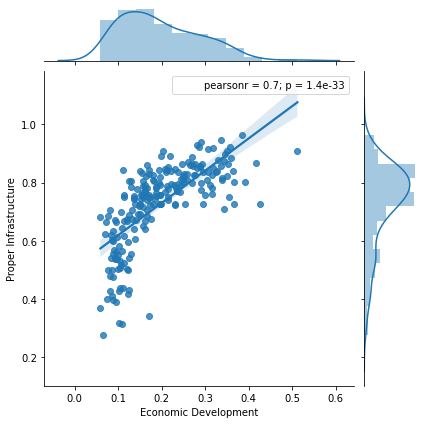

In [26]:
sns.jointplot('Economic Development','Proper Infrastructure',data=numerical,kind='reg',stat_func=pearsonr)

#### Observation 2 - Countries with worse health infrastructure have worse demographic poverty levels

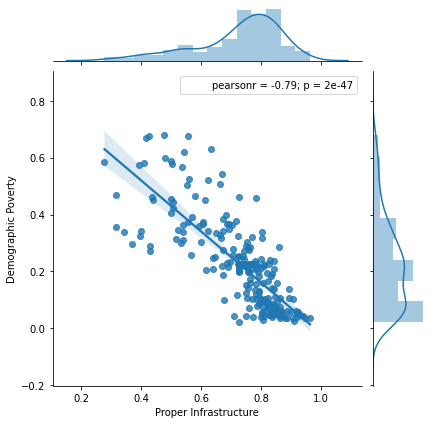

In [28]:
sns.jointplot('Proper Infrastructure', 'Demographic Poverty', data=numerical,kind='reg',stat_func=pearsonr)

#### Observation 3 - Countries with higher demographic poverty levels have higher onset of disease and death rates

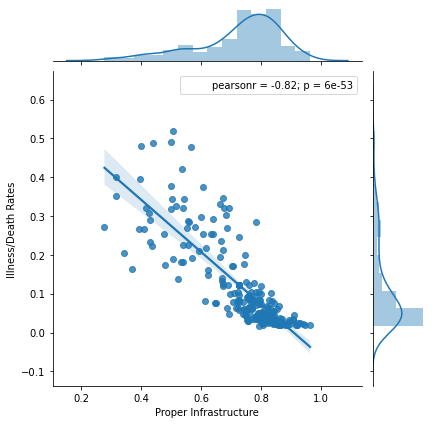

In [30]:
sns.jointplot('Proper Infrastructure','Illness/Death Rates',data=numerical,kind='reg',stat_func=pearsonr)

### Conclusion: 

Countries need to focus in economic, infrastructure, and social development in order to reduce illness and mortality rates, thereby enabling their population to live long healthy lives. 

Caveat: In reality, all these features are intertwined and it is not easy for governments to put in place effective strategies for growth. 